In [1]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install econml

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 38.7 MB/s eta 0:00:00


In [34]:
!pip install patsy
!pip install SyncRNG
!pip install itertools
!pip install causal_tree_learn
!pip install plotnine


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/c8/fd/491e078adb7ce1b32c25340296c9cea51c24aad1443dc6ed0036bf3112ee/causal-tree-learn-2.43.tar.gz (from https://pypi.org/simple/causal-tree-learn/) (requires-python:>=3.6): Requested causal_tree_learn from https://files.pythonhosted.org/packages/c8/fd/491e078adb7ce1b32c25340296c9cea51c24aad1443dc6ed0036bf3112ee/causal-tree-learn-2.43.tar.gz has inconsistent version: expected '2.43', but metadata has '2.42'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 11.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfull

In [40]:
import random
import pandas as pd
import numpy as np
from scipy.stats import norm

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from SyncRNG import SyncRNG
import numpy as np
import re
from statsmodels.sandbox.stats.multicomp import multipletests
from scipy import linalg
from itertools import chain

from SyncRNG import SyncRNG
from econml.grf import RegressionForest

from sklearn.model_selection import train_test_split
import plotnine as p
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches




In [140]:
df = pd.read_csv('/content/adcontentworth_qje.csv')
columna = df['risk']

df['high_risk'] = df['high_risk'].apply(lambda x: 1 if x == "HIGH" else 0)
df['medium_risk'] = df['risk'].apply(lambda x: 1 if x == "MEDIUM" else 0)
df['black'] = df['race'].apply(lambda x: 1 if x == "black" else 0)
df['colored'] = df['race'].apply(lambda x: 1 if x == "coloured" else 0)
df['indian'] = df['race'].apply(lambda x: 1 if x == "indian" else 0)
df = df.dropna(subset=['race'])
df.fillna(0, inplace=True)


In [170]:
treatment = "race_match"
outcome = "applied"
covariates = ['black','colored','indian','female','medium_risk','offer4','amountbrw_unc']
covariates_string = '+'.join(str(item) for item in covariates)
df.fillna(0, inplace=True)


In [162]:
df

,wave,dormancy,race,risk,offer4,prize,intshown,trcount,tookup,applied,...,applied_2weeks,tookup_after_med,tookup_after_long,stripany,comp_n,high_risk,medium_risk,black,colored,indian
0,2,20,black,HIGH,9.69,1.0,1.0,16.0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,2,16,black,HIGH,3.25,0.0,0.0,5.0,0,0,...,0,0,0,1,1,1,0,1,0,0
2,2,10,black,HIGH,4.44,0.0,1.0,17.0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2,18,black,HIGH,9.00,0.0,1.0,14.0,0,0,...,0,0,0,1,1,1,0,1,0,0
4,2,13,black,HIGH,9.75,1.0,0.0,14.0,0,0,...,0,0,0,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58163,3,1,black,HIGH,9.99,0.0,1.0,1.0,0,0,...,0,1,1,1,1,1,0,1,0,0
58164,3,1,black,HIGH,10.25,1.0,1.0,1.0,1,1,...,1,0,0,0,1,1,0,1,0,0
58165,3,1,black,HIGH,7.77,0.0,1.0,1.0,1,1,...,1,0,0,0,1,1,0,1,0,0
58166,3,1,black,HIGH,5.55,0.0,1.0,1.0,0,0,...,0,1,1,1,1,1,0,1,0,0


In [171]:
fmla = '0+' + covariates_string
desc = patsy.ModelDesc.from_formula(fmla)
desc.describe()
matrix = patsy.dmatrix(fmla, df, return_type = "dataframe")

T = df.loc[ : ,"high_risk"]
Y = df.loc[ : ,"applied"]
X = matrix
W = None

In [172]:
# Estimate a causal forest.
est2 = CausalForestDML(model_t=RegressionForest(),
                       model_y=RegressionForest(),
                       n_estimators=200, min_samples_leaf=5,
                       max_depth=50,
                       verbose=0, random_state=123)

est2.tune(Y, T, X=X, W=W)
est2.fit(Y, T, X=X, W=W)

In [173]:
# Get residuals  and propensity
residuals = est2.fit(Y, T, X=X, W=W, cache_values=True).residuals_
T_res = residuals[1]
e_hat = T - T_res

# T = beta_hat*X + e , beta_hat*X = T_hat = T-e

In [174]:
Prop = pd.DataFrame({"p_score":e_hat, "Treatment":T})

<Axes: xlabel='p_score', ylabel='Count'>

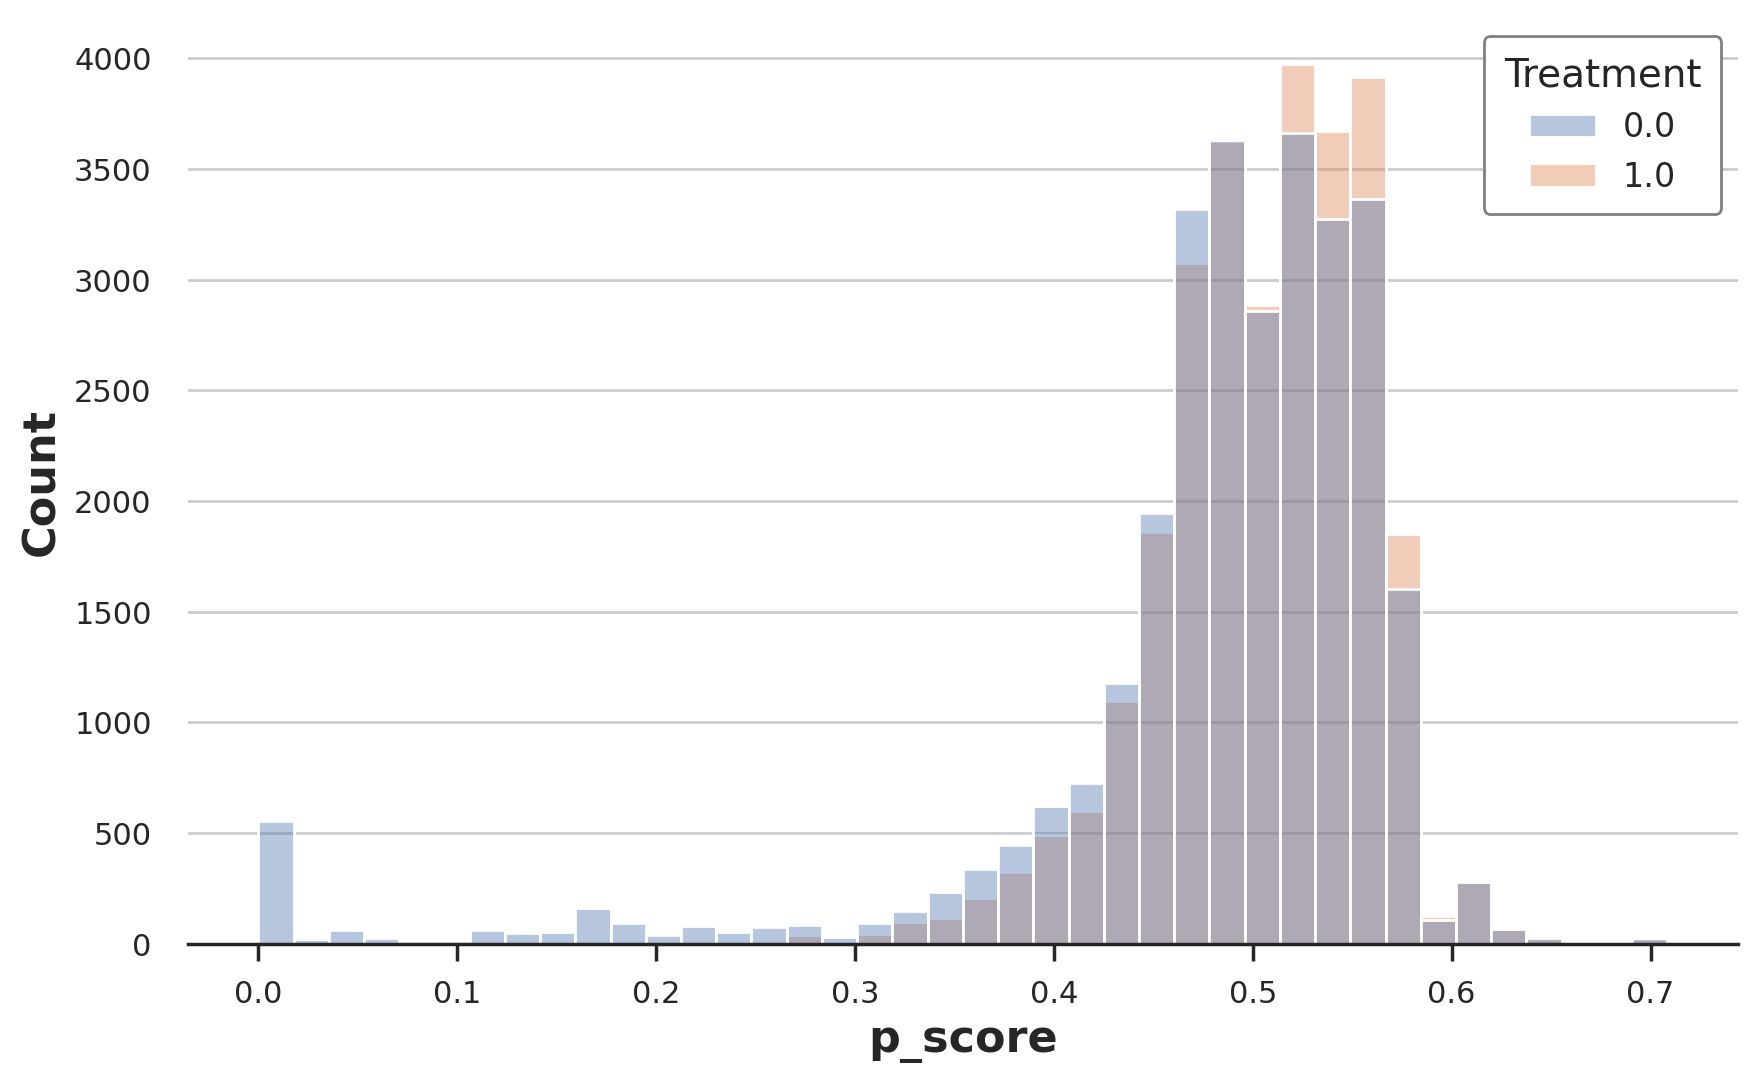

In [175]:
#Propensity score

sns.histplot(data=Prop, x="p_score", hue="Treatment", bins=40, alpha = 0.4)

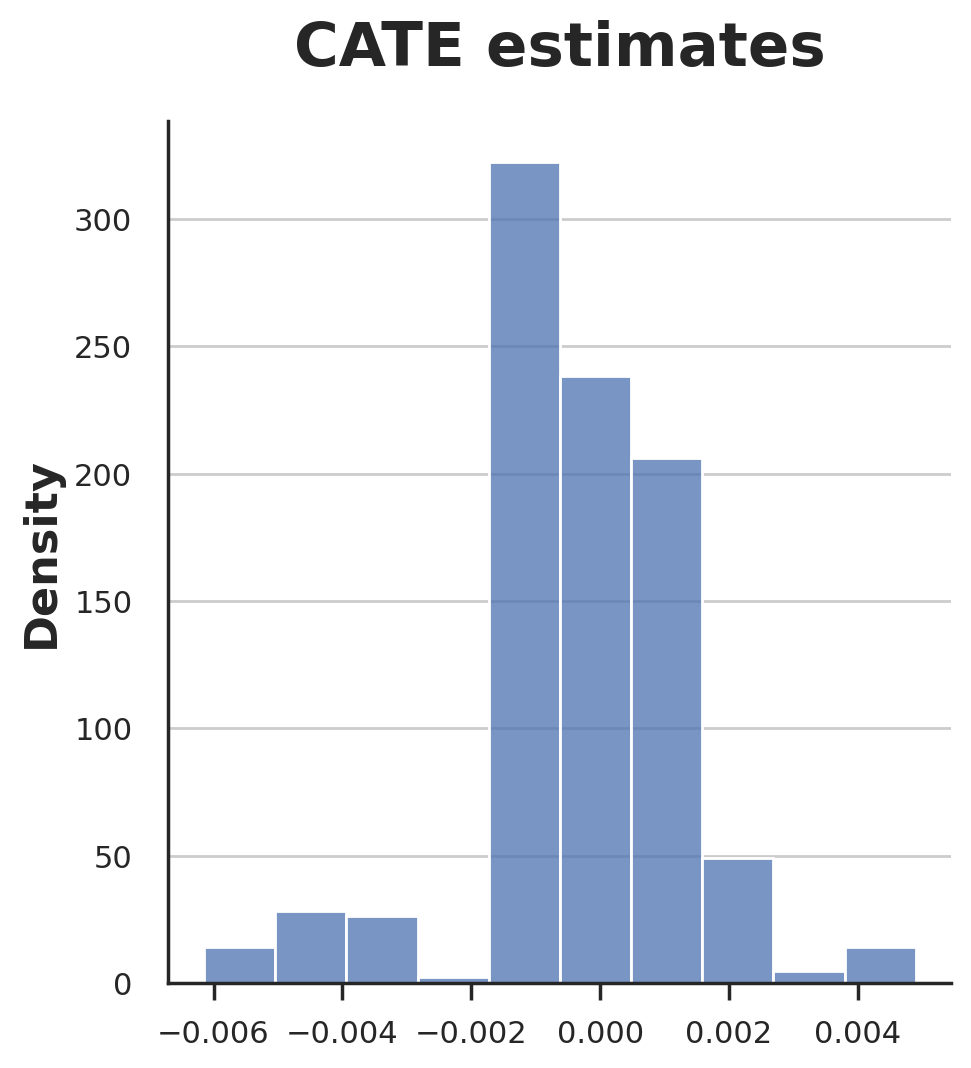

In [176]:
tau_hat = est2.effect(X=X) # tau(X) estimates
tau_hat
# Do not use this for assessing heterogeneity. See text above.
sns.displot( tau_hat, stat="density", bins = 10)
plt.title("CATE estimates")
est2.feature_importances()
importance = pd.DataFrame({"covariaties" : list(X.columns), "values" : est2.feature_importances()})
importance.sort_values('values', ascending = False)
importance.to_csv('table_forest.csv', index=False, sep=',', header=True, encoding='utf-8')



In [177]:
ATE = est2.effect(X)
# Calcular el intervalo de confianza del 95% para el ATE
ci_lower = ATE[1] - norm.ppf(0.975) * ATE[2]
ci_upper = ATE[1] + norm.ppf(0.975) * ATE[2]

# Imprimir el resultado
print("95% CI for the ATE:", round(ATE[1], 3),
      "+/-", round(norm.ppf(0.975) * ATE[2], 3))

95% CI for the ATE: 0.0 +/- 0.003
